In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
police_df = pd.read_csv('/content/3. Police Data.csv')

In [ ]:
police_df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [ ]:
police_df.shape

(65535, 15)

In [ ]:
police_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           65535 non-null  object 
 1   stop_time           65535 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       61474 non-null  object 
 4   driver_age_raw      61481 non-null  float64
 5   driver_age          61228 non-null  float64
 6   driver_race         61475 non-null  object 
 7   violation_raw       61475 non-null  object 
 8   violation           61475 non-null  object 
 9   search_conducted    65535 non-null  bool   
 10  search_type         2479 non-null   object 
 11  stop_outcome        61475 non-null  object 
 12  is_arrested         61475 non-null  object 
 13  stop_duration       61475 non-null  object 
 14  drugs_related_stop  65535 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 6.6+

In [ ]:
police_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
country_name,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
driver_age_raw,61481.0,1967.791106,121.050106,0.0,1965.0,1978.0,1985.0,8801.0
driver_age,61228.0,34.148984,12.760710,15.0,23.0,31.0,43.0,88.0


In [ ]:
police_df.dtypes

,0
stop_date,object
stop_time,object
country_name,float64
driver_gender,object
driver_age_raw,float64
driver_age,float64
driver_race,object
violation_raw,object
violation,object
search_conducted,bool


In [ ]:
police_df.isnull().sum()

,0
stop_date,0
stop_time,0
country_name,65535
driver_gender,4061
driver_age_raw,4054
driver_age,4307
driver_race,4060
violation_raw,4060
violation,4060
search_conducted,0


In [ ]:
police_df.drop('country_name', axis=1, inplace=True)
police_df.drop('search_type', axis=1, inplace=True)
police_df.drop('driver_race',axis=1, inplace=True)
police_df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop'],
      dtype='object')

In [ ]:
police_df.dropna(inplace=True)
police_df

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65529,12/6/2012,16:00,M,1994.0,18.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
65530,12/6/2012,17:54,F,1987.0,25.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
65531,12/6/2012,22:22,M,1954.0,58.0,White,Speeding,Speeding,False,Warning,False,0-15 Min,False
65532,12/6/2012,23:20,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,Citation,False,0-15 Min,False


In [ ]:
police_df['stop_date'] = pd.to_datetime(police_df['stop_date'])

In [ ]:
police_df['stop_time'] = pd.to_datetime(police_df['stop_time'])

<ipython-input-14-9d8944a9c8d4>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  police_df['stop_time'] = pd.to_datetime(police_df['stop_time'])


In [ ]:
police_df['month'] = police_df['stop_date'].dt.month
police_df['month']
police_df['hour'] = police_df['stop_time'].dt.hour
police_df['hour']

,hour
0,1
1,8
2,23
3,17
4,10
...,...
65529,16
65530,17
65531,22
65532,23


<ipython-input-16-3f63f0ed0edf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=police_df, palette= 'mako') # Change: Explicitly specify x='month'


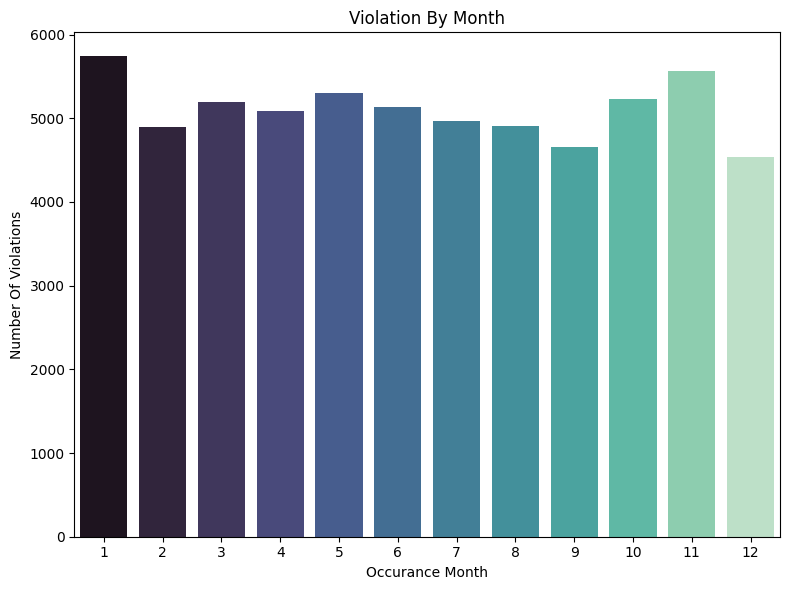

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='month', data=police_df, palette= 'mako')
plt.xlabel('Occurance Month')
plt.ylabel('Number Of Violations')
plt.title('Violation By Month')
plt.tight_layout()

<ipython-input-17-e314ba8a75f9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=police_df, palette= 'mako') # Change: Explicitly specify x='hour'


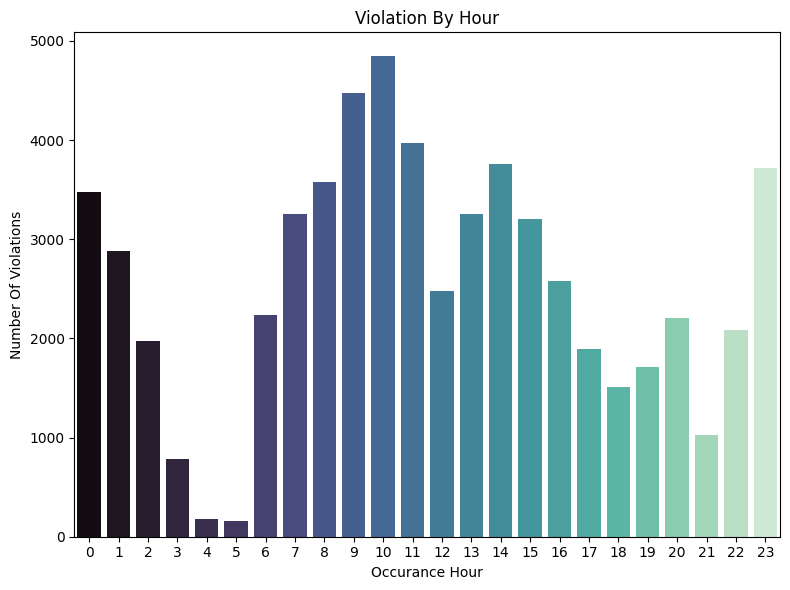

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='hour', data=police_df, palette= 'mako')
plt.xlabel('Occurance Hour')
plt.ylabel('Number Of Violations')
plt.title('Violation By Hour')
plt.tight_layout()

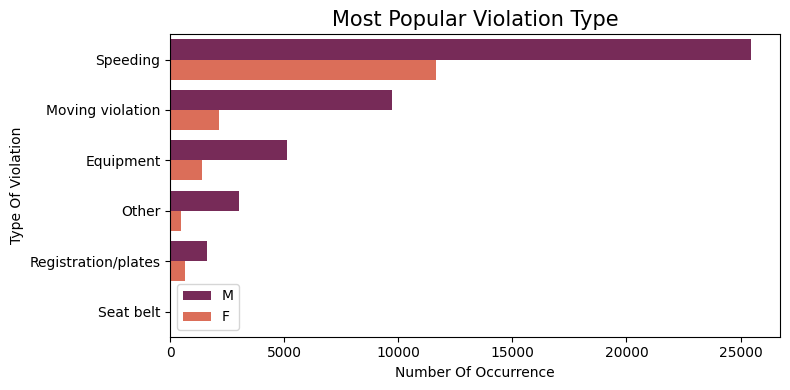

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(y='violation', data= police_df, palette='rocket', order = police_df.violation.value_counts().index,hue='driver_gender')
ax.set_xlabel('Number Of Occurrence', fontsize=10)
ax.set_ylabel('Type Of Violation')
ax.set_title('Most Popular Violation Type', fontsize=15)
ax.legend()
plt.tight_layout()

<ipython-input-19-9506c72f569a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='stop_outcome', data=police_df, palette='mako', order=police_df.stop_outcome.value_counts().index)


Text(0.5, 1.0, 'Most Popular Stop Outcomes')

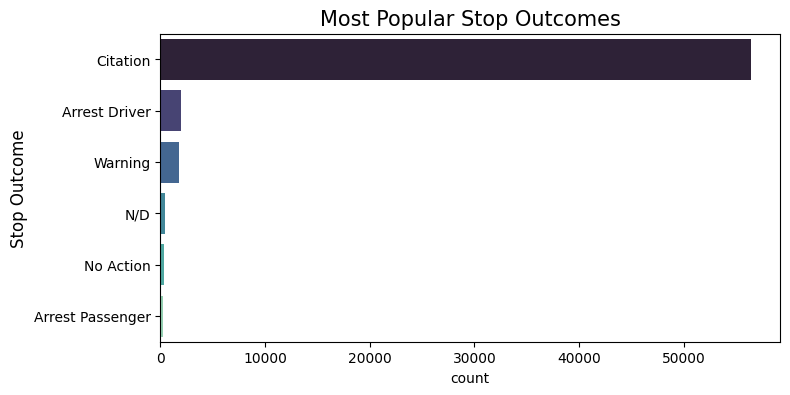

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(y='stop_outcome', data=police_df, palette='mako', order=police_df.stop_outcome.value_counts().index)
plt.ylabel('Stop Outcome', fontsize=12)
plt.title('Most Popular Stop Outcomes', fontsize=15)

In [ ]:
arrested = police_df.value_counts('is_arrested')
arrested

,count
is_arrested,
False,58964
True,2258


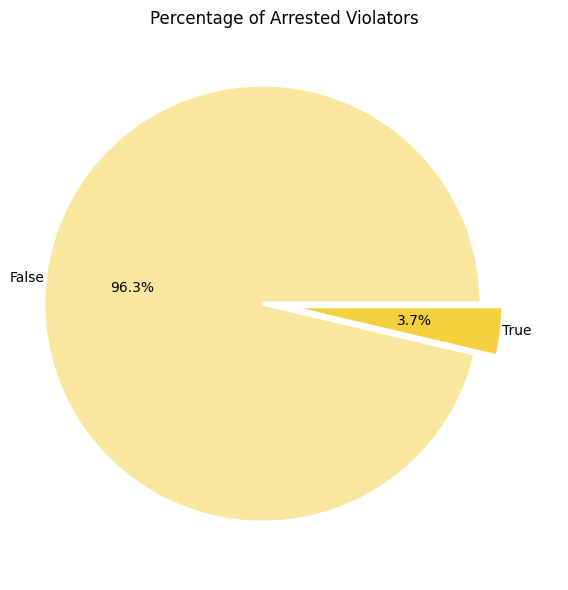

In [ ]:
plt.figure(figsize=(12,6))
plt.pie(arrested, labels= arrested.index, labeldistance=1., autopct='%1.1f%%', startangle=0,wedgeprops={'linewidth': 3, 'edgecolor': 'white'}, colors = ['#F9E79F', '#F4D03F'], explode=(0.1,0))
plt.title('Percentage of Arrested Violators')
plt.tight_layout()

In [ ]:
speed_violation = police_df[police_df['violation_raw'] == 'Speeding'].driver_gender.value_counts()
speed_violation

,count
driver_gender,
M,25458
F,11661


In [ ]:
colors = ['#088F8F', '#FFB6C1']
explode = (0, 0.1)

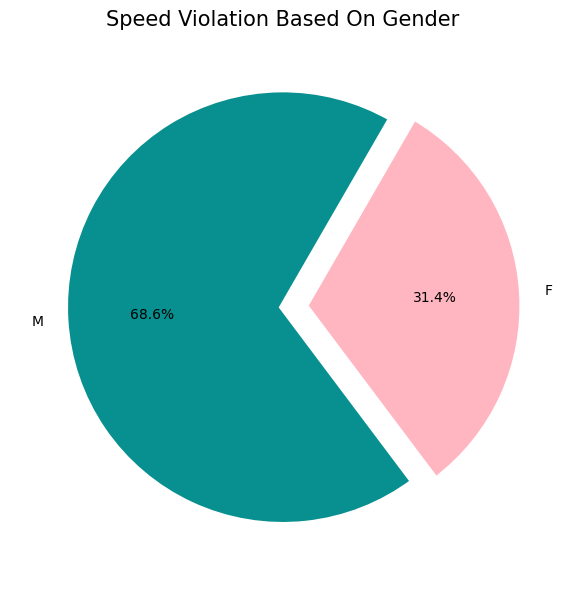

In [ ]:
plt.figure(figsize=(12,6))
plt.pie(speed_violation, labels= speed_violation.index, explode=explode , labeldistance=1.1, autopct='%1.1f%%', startangle=60,wedgeprops={'linewidth':5, 'edgecolor' : 'white'}, colors = colors)
plt.title('Speed Violation Based On Gender', fontsize=15)
plt.tight_layout()

Text(0.5, 1.0, 'Violations Occurrence Based On Age')

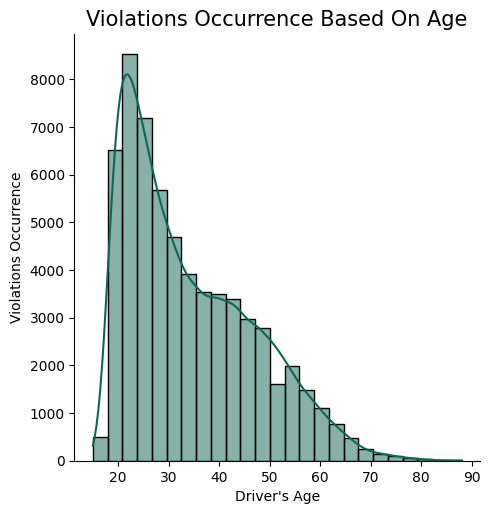

In [ ]:
sns.displot(police_df['driver_age'], kde=True, bins=25, color='#0E6655')
plt.xlabel("Driver's Age", fontsize=10)
plt.ylabel("Violations Occurrence", fontsize=10)
plt.title('Violations Occurrence Based On Age', fontsize=15)

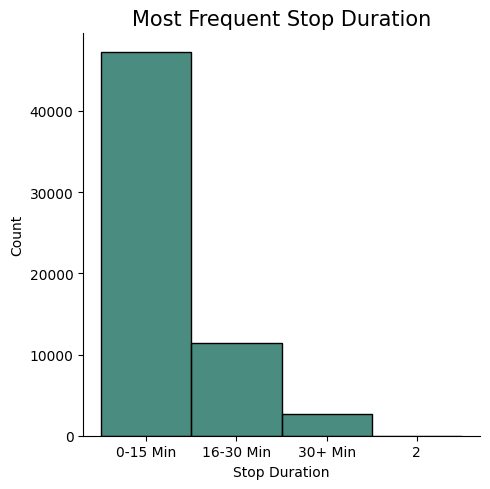

In [ ]:
sns.displot(police_df['stop_duration'], color='#0E6655')
plt.xlabel('Stop Duration', fontsize=10)
plt.title('Most Frequent Stop Duration', fontsize=15)
plt.tight_layout()